In [37]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

from scipy.stats import linregress




In [38]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [39]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [40]:
df['Systolic BP'] = ''
df[['Systolic BP']] = ''
df['Systolic BP'] = df[df.columns[9]].str.replace(r'[/].*', '', regex=True)
df['Diastolic BP'] = df[df.columns[9]].str.replace(r'.*[/]', '', regex=True)
df.corr()

C:\Users\charr\AppData\Local\Temp\ipykernel_3156\209605555.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [41]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [42]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [43]:
df.replace('Normal Weight', 'Normal')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [44]:
print(df[['BMI Category' , 'Blood Pressure']].to_string(index=False)) 

BMI Category Blood Pressure
  Overweight         126/83
      Normal         125/80
      Normal         125/80
       Obese         140/90
       Obese         140/90
       Obese         140/90
       Obese         140/90
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         132/87
      Normal         120/80
      Normal         132/87
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         120/80
      Normal         130/86
      Normal         130/86
      Normal         117/76
      Normal         125/80
      Normal        

In [45]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


<Axes: xlabel='BMI Category', ylabel='Systolic BP'>

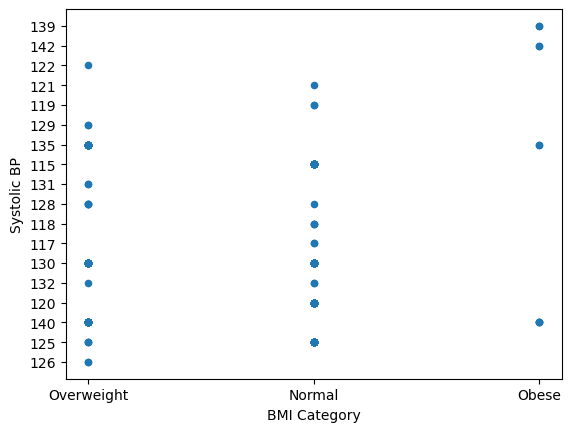

In [46]:
df.plot.scatter('BMI Category' , 'Systolic BP')

In [47]:
Dict = dict({1: 'Normal', 2: 'Overweight', 3: 'Obese'})


<Axes: xlabel='BMI Category', ylabel='Systolic BP'>

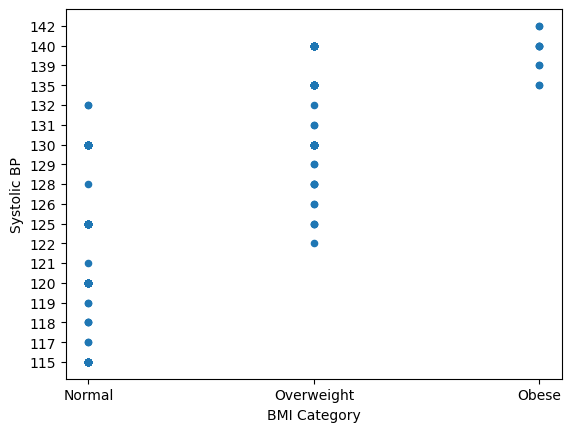

In [48]:
df.sort_values(by=['Systolic BP'], inplace=True)
df.plot.scatter('BMI Category' , 'Systolic BP')

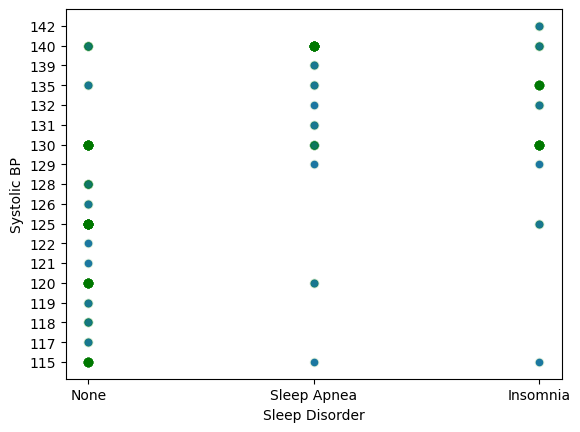

In [91]:
df.plot.scatter('Sleep Disorder' , 'Systolic BP')
plt.scatter(df['Sleep Disorder'], df['Systolic BP'],alpha=.1,color="green")

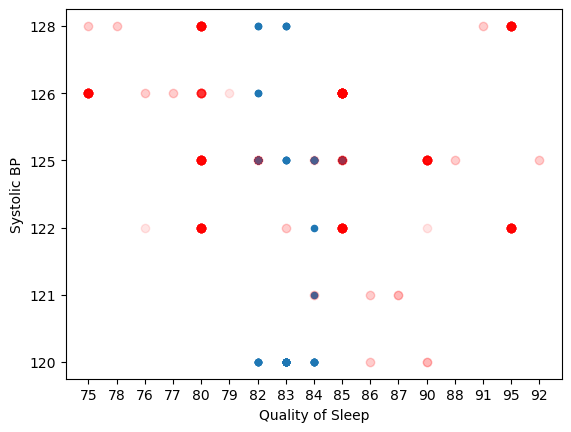

In [88]:
df.plot.scatter('Quality of Sleep' , 'Systolic BP')
x = df['Diastolic BP']
y = df['Quality of Sleep']
plt.scatter(df['Diastolic BP'],df['Quality of Sleep'],alpha=.1,color="Red")


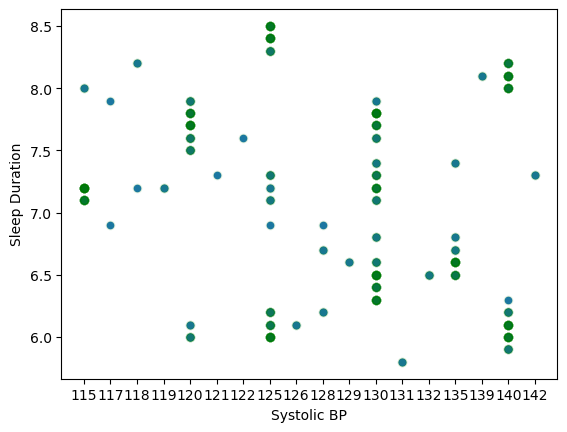

In [124]:
df.plot.scatter('Systolic BP' , 'Sleep Duration')
plt.scatter(df['Systolic BP'], df['Sleep Duration'],alpha=.1,color="green")

<Axes: xlabel='BMI Category', ylabel='Sleep Duration'>

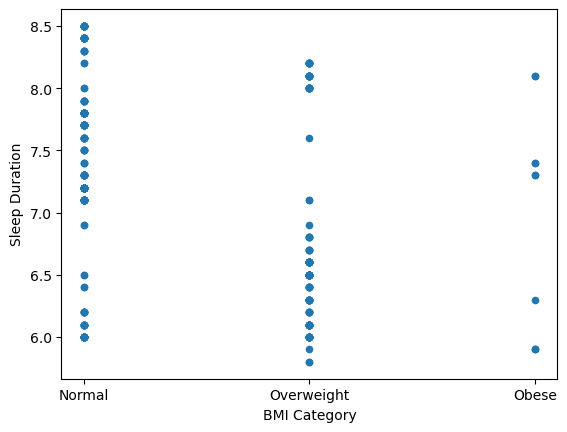

In [49]:
df.plot.scatter('BMI Category' , 'Sleep Duration')

<Axes: xlabel='BMI Category', ylabel='Quality of Sleep'>

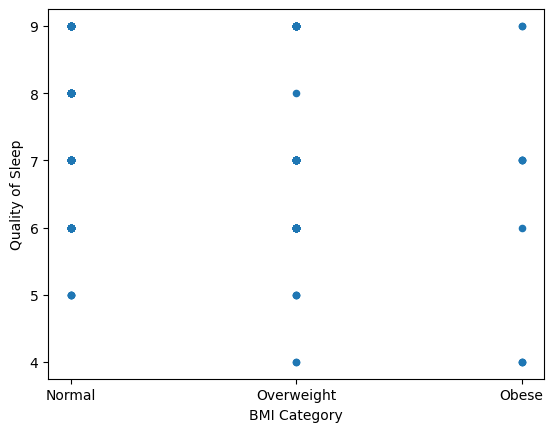

In [50]:
df.plot.scatter('BMI Category' , 'Quality of Sleep')

<Axes: xlabel='BMI Category', ylabel='Daily Steps'>

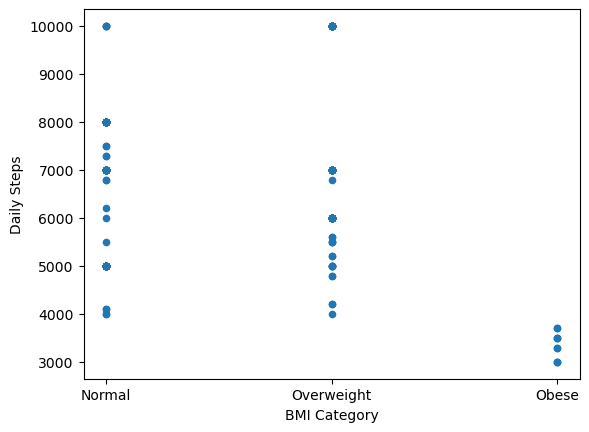

In [51]:
df.plot.scatter('BMI Category' , 'Daily Steps')

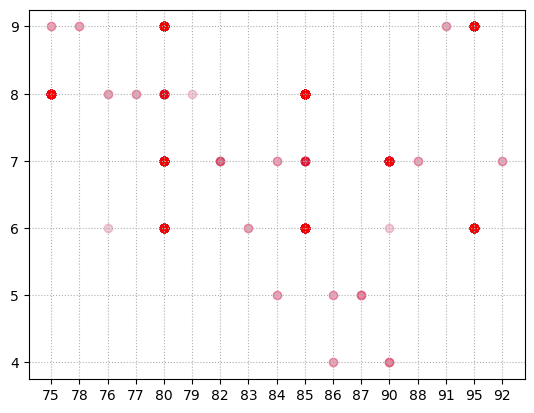

In [102]:
x = df['Diastolic BP']
y = df['Quality of Sleep']
plt.scatter(df['Diastolic BP'],df['Quality of Sleep'],alpha=.1,color="Purple")
plt.scatter(df['Diastolic BP'],df['Quality of Sleep'],alpha=.1,color="red")
plt.title= 'Diastolic BP vs Quality of Sleep'

<Axes: xlabel='BMI Category', ylabel='Physical Activity Level'>

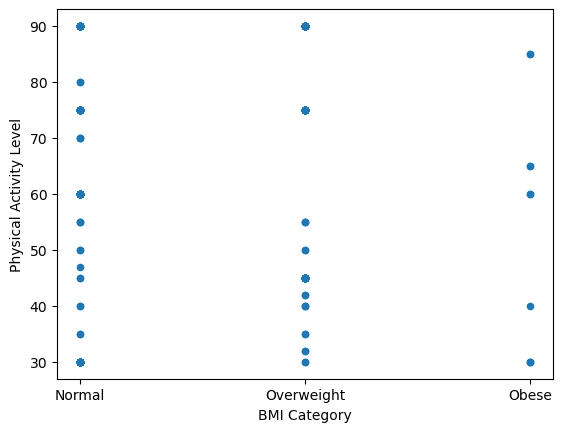

In [52]:
df.plot.scatter('BMI Category' , 'Physical Activity Level')

<Axes: xlabel='Quality of Sleep', ylabel='Systolic BP'>

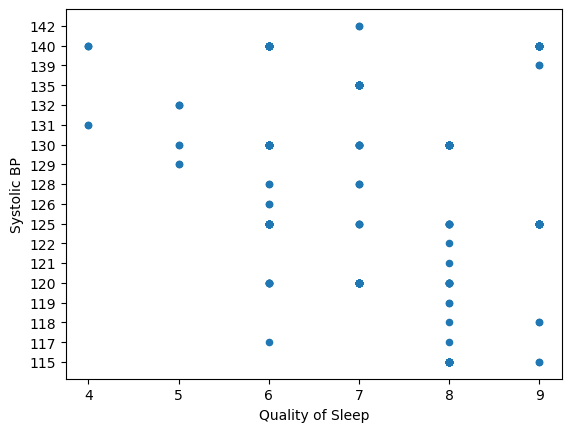

In [93]:
df.plot.scatter('Quality of Sleep' , 'Systolic BP',)


<Axes: xlabel='Daily Steps', ylabel='Systolic BP'>

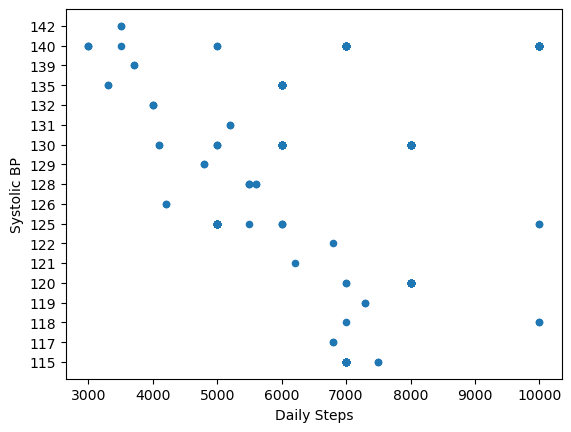

In [54]:
df.plot.scatter('Daily Steps' , 'Systolic BP')